In [931]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px


In [932]:
covid = pd.read_excel("covid19Vaccination.xlsx")

In [933]:
covid.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [934]:
covid.describe()

,ID,SEQID,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
count,81.000000,81.0,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000
mean,438142.000000,5412.0,3.965429e+05,1.828914e+05,5.794343e+05,1.032276e+06,8.407407,0.493827,8.901235,438061.000000
std,23.526581,0.0,7.727379e+05,3.171276e+05,1.088717e+06,1.872576e+06,24.283110,1.574194,25.764610,23.526581
min,438102.000000,5412.0,2.412800e+04,1.315500e+04,3.728300e+04,8.191000e+04,0.000000,0.000000,0.000000,438021.000000
25%,438122.000000,5412.0,1.069900e+05,4.914500e+04,1.575450e+05,2.849230e+05,0.000000,0.000000,0.000000,438041.000000
50%,438142.000000,5412.0,1.976310e+05,9.889600e+04,2.940100e+05,5.377620e+05,1.000000,0.000000,1.000000,438061.000000
75%,438162.000000,5412.0,3.955820e+05,1.871380e+05,5.805240e+05,1.081065e+06,6.000000,0.000000,6.000000,438081.000000
max,438182.000000,5412.0,6.197550e+06,2.419591e+06,8.617141e+06,1.546245e+07,193.000000,11.000000,204.000000,438101.000000


In [935]:
covid.drop(["ID", "CITY2", "SEQID", "DIFF_1DOSE", "DIFF_2DOSE", "DIFF_TOTAL", "PREVID"] , axis = 1, inplace = True)


In [936]:
covid.head()

,DATE_,CITY,_1DOSE,_2DOSE,_TOTAL,POPULATION
0,2021-06-26 22:41:31,Adana,784464,355404,1139868,2258718
1,2021-06-26 22:41:31,Adıyaman,170847,77955,248802,632459
2,2021-06-26 22:41:31,Afyonkarahisar,292611,138934,431545,736912
3,2021-06-26 22:41:31,Ağrı,94807,41146,135953,535435
4,2021-06-26 22:41:31,Aksaray,131889,62603,194492,423011


In [937]:
covid.tail()

,DATE_,CITY,_1DOSE,_2DOSE,_TOTAL,POPULATION
76,2021-06-26 22:41:31,Uşak,169159,81055,250214,369433
77,2021-06-26 22:41:31,Van,236641,91208,327849,1149342
78,2021-06-26 22:41:31,Yalova,129888,65920,195808,276050
79,2021-06-26 22:41:31,Yozgat,151825,81924,233749,419095
80,2021-06-26 22:41:31,Zonguldak,275433,139382,414815,591204


In [938]:
covid.set_axis(["date-tarih","city-şehir","1_dose-1.doz","2_dose-2.doz", "total-toplam", "population-nüfus"], axis = 1, inplace = True)

In [939]:
covid

,date-tarih,city-şehir,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus
0,2021-06-26 22:41:31,Adana,784464,355404,1139868,2258718
1,2021-06-26 22:41:31,Adıyaman,170847,77955,248802,632459
2,2021-06-26 22:41:31,Afyonkarahisar,292611,138934,431545,736912
3,2021-06-26 22:41:31,Ağrı,94807,41146,135953,535435
4,2021-06-26 22:41:31,Aksaray,131889,62603,194492,423011
...,...,...,...,...,...,...
76,2021-06-26 22:41:31,Uşak,169159,81055,250214,369433
77,2021-06-26 22:41:31,Van,236641,91208,327849,1149342
78,2021-06-26 22:41:31,Yalova,129888,65920,195808,276050
79,2021-06-26 22:41:31,Yozgat,151825,81924,233749,419095


In [940]:
covid.isnull().sum()

date-tarih          0
city-şehir          0
1_dose-1.doz        0
2_dose-2.doz        0
total-toplam        0
population-nüfus    0
dtype: int64

In [941]:
covid.shape

(81, 6)

In [942]:
marmara = ["İstanbul", "Balıkesir","Kocaeli","Tekirdağ", "Bursa", "Çanakkale",
          "Yalova","Edirne", "Kırklareli", "Sakarya","Bilecik"]

for r in marmara:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Marmara"

In [943]:
karadeniz = ["Amasya",  "Rize","Bartın", "Bayburt", "Bolu", "Tokat", "Çorum", "Gümüşhane", "Giresun",
            "Karabük", "Kastamonu", "Artvin","Ordu", "Zonguldak" ,"Samsun", "Sinop", "Trabzon", ]
for r in karadeniz:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Karadeniz"

In [944]:
doguAnadolu = ["Ağrı","Van", "Ardahan", "Bitlis","Kars" ,"Bingöl", "Erzurum","Elazığ", "Erzincan", 
               "Hakkari", "Igdır", "Malatya", "Muş","Tunceli", ]
for r in doguAnadolu:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Doğu Anadolu"


In [945]:
guneydogu_Anadolu = ["Gaziantep", "Diyarbakır", "Şanlıurfa", "Batman", "Adıyaman",
                "Siirt", "Mardin", "Kilis", "Şırnak"]

for r in guneydogu_Anadolu:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Güneydoğu Anadolu"
    

In [946]:
akdeniz = ["Antalya","Osmaniye", "Adana","Isparta", "Mersin", "Burdur","Hatay",  
          "Kahramanmaraş", ]
for r in akdeniz:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Akdeniz"

In [947]:
ege = ["İzmir", "Manisa", "Aydın", "Uşak","Denizli", "Afyonkarahisar", "Kütahya", "Muğla"]

for r in ege:
    covid.loc[covid["city-şehir"] == r, "Bölge-Region"] = "Ege"
    

In [948]:
icAnadolu = ["Ankara", "Konya","Niğde",  "Kayseri","Nevşehir", "Eskişehir","Çankırı","Kırıkkale", "Sivas",  "Aksaray",
             "Karaman", "Kırşehir",  "Yozgat", ]

for r in icAnadolu:
    covid.loc[covid["city-şehir"]==r, "Bölge-Region"] = "İç Anadolu"
    

In [949]:
covid.head()

,date-tarih,city-şehir,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Bölge-Region
0,2021-06-26 22:41:31,Adana,784464,355404,1139868,2258718,Akdeniz
1,2021-06-26 22:41:31,Adıyaman,170847,77955,248802,632459,Güneydoğu Anadolu
2,2021-06-26 22:41:31,Afyonkarahisar,292611,138934,431545,736912,Ege
3,2021-06-26 22:41:31,Ağrı,94807,41146,135953,535435,Doğu Anadolu
4,2021-06-26 22:41:31,Aksaray,131889,62603,194492,423011,İç Anadolu


In [950]:
covid.isnull().sum()

date-tarih          0
city-şehir          0
1_dose-1.doz        0
2_dose-2.doz        0
total-toplam        0
population-nüfus    0
Bölge-Region        2
dtype: int64

In [951]:
asilamaOrani = covid["Vaccination_Rate-Aşılama_Oranı"] = covid["total-toplam"] / covid["population-nüfus"]

In [952]:
asilamaOrani

0     0.504653
1     0.393388
2     0.585613
3     0.253911
4     0.459780
        ...   
76    0.677292
77    0.285249
78    0.709321
79    0.557747
80    0.701644
Length: 81, dtype: float64

In [953]:
covid

,date-tarih,city-şehir,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Bölge-Region,Vaccination_Rate-Aşılama_Oranı
0,2021-06-26 22:41:31,Adana,784464,355404,1139868,2258718,Akdeniz,0.504653
1,2021-06-26 22:41:31,Adıyaman,170847,77955,248802,632459,Güneydoğu Anadolu,0.393388
2,2021-06-26 22:41:31,Afyonkarahisar,292611,138934,431545,736912,Ege,0.585613
3,2021-06-26 22:41:31,Ağrı,94807,41146,135953,535435,Doğu Anadolu,0.253911
4,2021-06-26 22:41:31,Aksaray,131889,62603,194492,423011,İç Anadolu,0.459780
...,...,...,...,...,...,...,...,...
76,2021-06-26 22:41:31,Uşak,169159,81055,250214,369433,Ege,0.677292
77,2021-06-26 22:41:31,Van,236641,91208,327849,1149342,Doğu Anadolu,0.285249
78,2021-06-26 22:41:31,Yalova,129888,65920,195808,276050,Marmara,0.709321
79,2021-06-26 22:41:31,Yozgat,151825,81924,233749,419095,İç Anadolu,0.557747


In [954]:
covid.sort_values("Vaccination_Rate-Aşılama_Oranı",  ascending = False). head(40)
                                                                            
                                                                             
                                                                             

,date-tarih,city-şehir,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Bölge-Region,Vaccination_Rate-Aşılama_Oranı
58,2021-06-26 22:41:31,Muğla,578641,286979,865620,1000773,Ege,0.864951
27,2021-06-26 22:41:31,Edirne,226150,123707,349857,407763,Marmara,0.857991
21,2021-06-26 22:41:31,Çanakkale,298662,161433,460095,541548,Marmara,0.849592
11,2021-06-26 22:41:31,Balıkesir,661424,359073,1020497,1240285,Marmara,0.822792
48,2021-06-26 22:41:31,Kırklareli,197631,98896,296527,361737,Marmara,0.819731
68,2021-06-26 22:41:31,Sinop,104450,61944,166394,216460,Karadeniz,0.768706
75,2021-06-26 22:41:31,Tunceli,40463,23646,64109,83443,Doğu Anadolu,0.768297
5,2021-06-26 22:41:31,Amasya,169285,87322,256607,335494,Karadeniz,0.764863
10,2021-06-26 22:41:31,Aydın,555807,293208,849015,1119084,Ege,0.758670
31,2021-06-26 22:41:31,Eskişehir,457620,215045,672665,888828,İç Anadolu,0.756800


In [955]:
covid.sort_values("Vaccination_Rate-Aşılama_Oranı",  ascending = True). head(40)

,date-tarih,city-şehir,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Bölge-Region,Vaccination_Rate-Aşılama_Oranı
70,2021-06-26 22:41:31,Şanlıurfa,266534,109394,375928,2115256,Güneydoğu Anadolu,0.177722
71,2021-06-26 22:41:31,Şırnak,70624,25473,96097,537762,Güneydoğu Anadolu,0.178698
67,2021-06-26 22:41:31,Siirt,45367,19836,65203,331070,Güneydoğu Anadolu,0.196946
56,2021-06-26 22:41:31,Mardin,124235,53374,177609,854716,Güneydoğu Anadolu,0.207799
17,2021-06-26 22:41:31,Bitlis,51093,23726,74819,350994,Doğu Anadolu,0.213163
35,2021-06-26 22:41:31,Hakkari,47078,14102,61180,280514,Doğu Anadolu,0.218100
59,2021-06-26 22:41:31,Muş,62187,29056,91243,411117,Doğu Anadolu,0.221939
25,2021-06-26 22:41:31,Diyarbakır,307868,134167,442035,1783431,Güneydoğu Anadolu,0.247857
3,2021-06-26 22:41:31,Ağrı,94807,41146,135953,535435,Doğu Anadolu,0.253911
13,2021-06-26 22:41:31,Batman,108989,48556,157545,620278,Güneydoğu Anadolu,0.253991


In [956]:
bolgelerim = covid.groupby("Bölge-Region")

In [957]:
bolgelerimOrtalama = bolgelerim.mean()

In [958]:
asilama = covid.groupby("Vaccination_Rate-Aşılama_Oranı")

In [959]:
asilamaOrtalama = asilama.mean()

In [960]:
c = covid.corr()

In [961]:
c

,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Vaccination_Rate-Aşılama_Oranı
1_dose-1.doz,1.000000,0.994893,0.999568,0.987001,0.109480
2_dose-2.doz,0.994893,1.000000,0.997430,0.972741,0.148566
total-toplam,0.999568,0.997430,1.000000,0.983889,0.120981
population-nüfus,0.987001,0.972741,0.983889,1.000000,-0.006926
Vaccination_Rate-Aşılama_Oranı,0.109480,0.148566,0.120981,-0.006926,1.000000


In [962]:
bolgelerimOrtalama

,1_dose-1.doz,2_dose-2.doz,total-toplam,population-nüfus,Vaccination_Rate-Aşılama_Oranı
Bölge-Region,,,,,
Akdeniz,493935.000000,234783.500000,7.287185e+05,1.344902e+06,0.567833
Doğu Anadolu,114776.076923,54893.923077,1.696700e+05,4.508095e+05,0.408284
Ege,637593.625000,303528.750000,9.411224e+05,1.336139e+06,0.694610
Güneydoğu Anadolu,189874.666667,77194.888889,2.670696e+05,1.013213e+06,0.273611
Karadeniz,195859.588235,104665.647059,3.005252e+05,4.423818e+05,0.674539
Marmara,978093.636364,412978.454545,1.391072e+06,2.339214e+06,0.697656
İç Anadolu,428959.000000,206312.769231,6.352718e+05,1.025980e+06,0.594603


In [963]:
bolgelerimOrtalama.drop("population-nüfus", axis=1, inplace =True)
bolgelerimOrtalama.style.background_gradient(cmap="Reds")


,1_dose-1.doz,2_dose-2.doz,total-toplam,Vaccination_Rate-Aşılama_Oranı
Bölge-Region,,,,
Akdeniz,493935.000000,234783.500000,728718.500000,0.567833
Doğu Anadolu,114776.076923,54893.923077,169670.000000,0.408284
Ege,637593.625000,303528.750000,941122.375000,0.694610
Güneydoğu Anadolu,189874.666667,77194.888889,267069.555556,0.273611
Karadeniz,195859.588235,104665.647059,300525.235294,0.674539
Marmara,978093.636364,412978.454545,1391072.090909,0.697656
İç Anadolu,428959.000000,206312.769231,635271.769231,0.594603


In [964]:
fig = px.bar(covid, x="1_dose-1.doz", y="Bölge-Region", color="city-şehir", title="Completed 1nd dose of Vaccine as of June 26, 26 Haziran'da tamamlanan 1.doz aşı")
fig.show()

In [965]:
fig = px.bar(covid, x="2_dose-2.doz", y="Bölge-Region", color="city-şehir", title="Completed 2nd dose of Vaccine as of June 26, 26 Haziran'da tamamlanan 2.doz aşı")
fig.show()

In [966]:
fig = px.bar(covid, x="total-toplam", y="Bölge-Region", color="city-şehir", title="Completed total of Vaccine as of June 26 - 26 Haziran'da tamamlanan toplam aşı ")
fig.show()

In [967]:
bolgelerimOrtalama.drop("1_dose-1.doz", axis = 1, inplace = True)

In [968]:
bolgelerimOrtalama.drop("2_dose-2.doz", axis = 1, inplace = True)

In [969]:
bolgelerimOrtalama.drop("total-toplam", axis = 1, inplace = True)

<AxesSubplot:xlabel='Bölge-Region'>

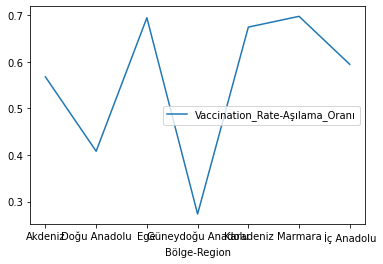

In [970]:
bolgelerimOrtalama.plot()